![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
serie_pop = pd.Series([70,8,300,1200], index=["France","Suisse","USA","Chine"])

In [3]:
serie_pop

France      70
Suisse       8
USA        300
Chine     1200
dtype: int64

In [4]:
serie_pop["Suisse"]

8

In [5]:
serie_pop2 = pd.Series([70,8,300,1200], index=[1,0,3,5])
serie_pop2.iloc[1]

8

In [6]:
serie_pop[["France","Suisse"]]

France    70
Suisse     8
dtype: int64

In [7]:
serie_pop>50

France     True
Suisse    False
USA        True
Chine      True
dtype: bool

In [8]:
serie_pop[serie_pop>50]

France      70
USA        300
Chine     1200
dtype: int64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [9]:
serie_pop.name = "Populations"
serie_pop.index.name = "Pays"

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [10]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [11]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

In [12]:
ser_nan = pd.Series([2,np.nan,4],index=['a','b','c'])

In [13]:
ser_nan.mean()

3.0

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

In [14]:
import datetime

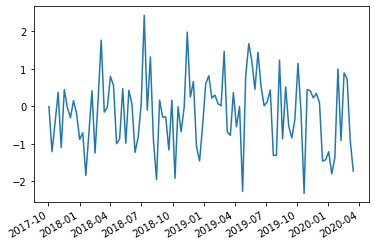

In [15]:
dates = pd.date_range(start="2017-10-03",end=datetime.date.today(),periods=100)
donnees = np.random.randn(len(dates))
serie_temp = pd.Series(donnees,index=dates)
serie_temp.plot()

In [16]:
def affiche_graphique(start, freq="D"):
    dates = pd.date_range(start=start,end=datetime.date.today(),freq=freq)
    donnees = np.random.randn(len(dates))
    serie_temp = pd.Series(donnees,index=dates)
    serie_temp.plot()

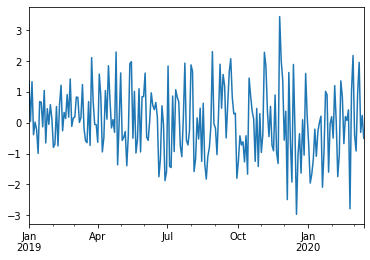

In [17]:
affiche_graphique("2019-01-01",freq="2 D")

# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [18]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,-0.368908,0.837867
obs_1,-0.837323,-0.252969
obs_2,-0.582708,-0.688394
obs_3,0.060093,0.203725
obs_4,-0.267241,-0.014807


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [19]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [20]:
frame1.head(3)

,col_0,col_1
obs_0,-0.368908,0.837867
obs_1,-0.837323,-0.252969
obs_2,-0.582708,-0.688394


Pour afficher un résumé du DF :

In [21]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [22]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv",index_col='id',dtype={"scrape_id":object})
airbnb.head()

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,NaN,...,f,f,flexible,f,f,1,1,0,0,0.28
5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",The staircase leading up to the apartment is n...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,Important: Be conscious that an apartment in a...,...,f,f,moderate,f,f,1,1,0,0,2.47
8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,Velib station outside.,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [23]:
airbnb.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59126 entries, 3109 to 34477345
Data columns (total 105 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   listing_url                                   object 
 1   scrape_id                                     object 
 2   last_scraped                                  object 
 3   name                                          object 
 4   summary                                       object 
 5   space                                         object 
 6   description                                   object 
 7   experiences_offered                           object 
 8   neighborhood_overview                         object 
 9   notes                                         object 
 10  transit                                       object 
 11  access                                        object 
 12  interaction                                   object 

In [24]:
airbnb.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=105)

In [25]:
# pour extraire une colonne, on utilise :
airbnb["name"]
#airbnb.name

id
3109                                             zen and calm
5396                           Explore the heart of old Paris
7397                         MARAIS - 2ROOMS APT - 2/4 PEOPLE
8522                                  GREAT FLAT w/ CITY VIEW
9359          Cozy, Central Paris: WALK or VELIB EVERYWHERE !
                                  ...                        
34474966        Newly renovated Studio in the center of Paris
34475492                             New family flat in Paris
34476275    Charmante Petite Maison près du Canal Saint Ma...
34476597                         Quiet Pop Art Room / Central
34477345               Appartement au bord du Canal St Martin
Name: name, Length: 59126, dtype: object

In [26]:
for col in airbnb.columns:
    if airbnb[col].dtype == np.number:
        print(col, airbnb[col].min(), sep=" : ")

thumbnail_url : nan
medium_url : nan
xl_picture_url : nan
host_acceptance_rate : nan
host_listings_count : 0.0
host_total_listings_count : 0.0
neighbourhood_group_cleansed : nan
latitude : 48.81237
longitude : 2.2248099999999997
bathrooms : 0.0
bedrooms : 0.0
beds : 0.0
square_feet : 0.0
minimum_nights_avg_ntm : 1.0
maximum_nights_avg_ntm : 1.0
review_scores_rating : 20.0
review_scores_accuracy : 2.0
review_scores_cleanliness : 2.0
review_scores_checkin : 2.0
review_scores_communication : 2.0
review_scores_location : 2.0
review_scores_value : 2.0
reviews_per_month : 0.0


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [27]:
frame_list = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [28]:
type(frame_list)

list

In [29]:
len(frame_list)

1

In [30]:
frame_list[0].head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
1,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
2,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
3,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
4,The Enloe State Bank,Cooper,TX,10716,"Legend Bank, N. A.","May 31, 2019"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [31]:
credit2 = pd.read_excel("./data/credit2.xlsx")#,usecols="A:D")

In [32]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [33]:
ville = pd.ExcelFile("./data/ville.xls")

In [34]:
type(ville)

pandas.io.excel._base.ExcelFile

In [35]:
ville.sheet_names

['ville', 'ville-ain']

On cherche à extraire les feuilles avec le mot "ain" dans le nom de la feuille

In [36]:
def extraire_feuilles_nom(io, terme):
    """ Fonction permettant d'extraire les feuilles comprenant un terme dans leur nom de feuille
    sous forme de liste de DataFrames"""
    
    liste_feuilles = []
    classeur = pd.ExcelFile(io)

    for nom_feuille in classeur.sheet_names:
        if terme in nom_feuille:
            liste_feuilles.append(classeur.parse(nom_feuille))
    
    return liste_feuilles

In [37]:
liste_ain = extraire_feuilles_nom("./data/ville.xls", terme="ville")

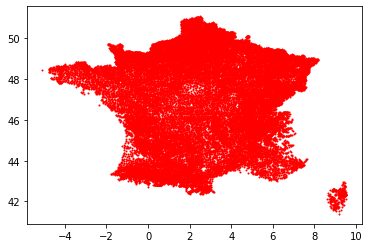

In [38]:
import matplotlib.pyplot as plt
plt.scatter(" Longitude "," Latitude ",data=liste_ain[0],s=1,c="red")

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [39]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [40]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")

In [41]:
connexion.table_names()

['Salaries']

In [42]:
salaries = pd.read_sql_query("select * from salaries",con=connexion)

In [43]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur airbnb en se basant sur le prix

In [44]:
# on transforme la colonne prix
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str[1:].str.replace(",",""))
airbnb["price_num2"] = pd.to_numeric(airbnb["price"].str.replace("$","").str.replace(",",""))

In [45]:
airbnb.sort_values("price_num",ascending=False)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_num,price_num2
id,,,,,,,,,,,,,,,,,,,,,
7225849,https://www.airbnb.com/rooms/7225849,20190507030954,2019-05-07,"Artistic apartment, Montmartre",2 bedrooms on different floors in this Duplex....,English: Lots of art in various form will be s...,2 bedrooms on different floors in this Duplex....,none,NaN,NaN,...,moderate,f,f,1,1,0,0,0.51,9379.0,9379.0
27608896,https://www.airbnb.com/rooms/27608896,20190507030954,2019-05-07,Petit studio parisien,Petit studio tranquille dans le 14e Reposant e...,NaN,Petit studio tranquille dans le 14e Reposant e...,none,NaN,NaN,...,flexible,f,f,1,0,1,0,0.11,8932.0,8932.0
8093890,https://www.airbnb.com/rooms/8093890,20190507030954,2019-05-08,EIFFEL TOWER TROCADERO 2 BEDROOM,Wonderful parisian flat close (3 min walk) to ...,"The room is situated in a very nice Parisian ""...",Wonderful parisian flat close (3 min walk) to ...,none,"Close to Trocadero, arc de Triomphe, the area ...",NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,0.21,8721.0,8721.0
25448670,https://www.airbnb.com/rooms/25448670,20190507030954,2019-05-08,cosytiti Paris 15,cosytiti,cosytiti,cosytiti cosytiti facile,none,NaN,NaN,...,flexible,f,f,1,1,0,0,0.18,8576.0,8576.0
6088687,https://www.airbnb.com/rooms/6088687,20190507030954,2019-05-07,Lovely Duplex 30m2 - Le Marais,The apartment is a charming studio organized i...,Hello! I entrust to you my charming duplex apa...,The apartment is a charming studio organized i...,none,"Great neighbourhood, very central in the 3rd d...",-I do not charge any cleaning fees but I want ...,...,strict_14_with_grace_period,f,f,1,1,0,0,0.78,8500.0,8500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20219162,https://www.airbnb.com/rooms/20219162,20190507030954,2019-05-07,Nice & cosy parisian flat,Hello :) Welcome to the best area of Paris ! T...,NaN,Hello :) Welcome to the best area of Paris ! T...,none,NaN,NaN,...,moderate,f,f,1,1,0,0,0.12,0.0,0.0
20291987,https://www.airbnb.com/rooms/20291987,20190507030954,2019-05-08,Romantic Garden view near Champs-Elysées,"Very private, on an inner romantic garden, rem...",The studio offers a well-equipped space and is...,"Very private, on an inner romantic garden, rem...",none,"Quiet neighborhood, small supermarket across t...","We have another apartment on the 3rd floor, ex...",...,strict_14_with_grace_period,f,f,5,5,0,0,1.42,0.0,0.0
20962304,https://www.airbnb.com/rooms/20962304,20190507030954,2019-05-07,Beau deux pièces au cœur du 15e,NaN,Bel appartement de 45 m2 au cœur du 15 éme arr...,Bel appartement de 45 m2 au cœur du 15 éme arr...,none,"Le logement se trouve dans un quartier calme, ...",NaN,...,flexible,f,f,1,1,0,0,NaN,0.0,0.0


In [46]:
airbnb_sorted = airbnb.sort_values(["cancellation_policy","price_num"],ascending=[True,False])
airbnb_sorted[["cancellation_policy","price_num"]]

,cancellation_policy,price_num
id,,
27608896,flexible,8932.0
25448670,flexible,8576.0
23713978,flexible,3500.0
20047271,flexible,3000.0
32885765,flexible,3000.0
...,...,...
23660261,super_strict_60,64.0
2535256,super_strict_60,63.0
12894872,super_strict_60,63.0


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [47]:
airbnb["price_num"].mean()

116.32598180157629

In [48]:
airbnb["price_num"].median()

80.0

In [49]:
airbnb["price_num"].describe()

count    59126.000000
mean       116.325982
std        167.669754
min          0.000000
25%         59.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price_num, dtype: float64

In [50]:
def etendue(col):
    return col.max()-col.min()

In [51]:
airbnb[["price_num","review_scores_location"]].agg(["mean","median","std",lambda x : x.max()-x.min(),etendue]).to_excel("stat_aribnb.xlsx")

# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


In [52]:
airbnb["price_num"] = airbnb["price_num"].fillna(airbnb["price_num"].mean())

In [53]:
airbnb.select_dtypes(object).fillna("manquant")

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,manquant,...,2016-12-27,2018-12-19,t,manquant,{PARIS},f,f,flexible,f,f
5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",The staircase leading up to the apartment is n...,...,2009-06-30,2019-04-19,t,7510402838018,{PARIS},t,f,strict_14_with_grace_period,f,f
7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,manquant,Important: Be conscious that an apartment in a...,...,2011-04-08,2019-04-20,t,7510400829623,{PARIS},f,f,moderate,f,f
8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,manquant,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,manquant,manquant,...,2010-06-16,2010-06-16,t,manquant,{PARIS},f,f,moderate,f,f
9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,manquant,Velib station outside.,...,manquant,manquant,t,manquant,{PARIS},f,f,strict_14_with_grace_period,t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34474966,https://www.airbnb.com/rooms/34474966,20190507030954,2019-05-07,Newly renovated Studio in the center of Paris,Newly renovated studio in the center of Paris ...,Completely renovated studio in the heart of Pa...,Newly renovated studio in the center of Paris ...,none,The studio is situated on the border to the 3r...,manquant,...,manquant,manquant,t,7511002575655,{PARIS},f,f,flexible,f,f
34475492,https://www.airbnb.com/rooms/34475492,20190507030954,2019-05-08,New family flat in Paris,"L'appartement est de 175m2, il est idéal pour ...",manquant,"L'appartement est de 175m2, il est idéal pour ...",none,Beaucoup de commerces à proximité.,manquant,...,manquant,manquant,t,manquant,{PARIS},f,f,strict_14_with_grace_period,f,f
34476275,https://www.airbnb.com/rooms/34476275,20190507030954,2019-05-07,Charmante Petite Maison près du Canal Saint Ma...,Charmante petite maison singulière au bord du ...,Maison signifie que vous n'aurez pas à porter ...,Charmante petite maison singulière au bord du ...,none,"Le Canal Saint Martin, point fort du tourisme ...",manquant,...,manquant,manquant,t,manquant,{PARIS},f,f,flexible,f,f


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2).


In [54]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str[1:].str.replace(",",""))

airbnb_reduit = airbnb[["id","price_num","review_scores_location"]]

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
airbnb_reduit.head()

,id,price_num,review_scores_location
0,3109,75.0,10.0
1,5396,115.0,10.0
2,7397,115.0,10.0
3,8522,90.0,NaN
4,9359,75.0,NaN


In [56]:
calendrier = pd.read_csv("https://www.stat4decision.com/calendar.csv.gz")

In [57]:
calendrier.head()

,listing_id,date,available,price
0,2679020,2019-03-09,f,NaN
1,2679020,2019-03-08,f,NaN
2,2679020,2019-03-07,f,NaN
3,2679020,2019-03-06,f,NaN
4,2679020,2019-03-05,f,NaN


In [58]:
airbnb_merged = pd.merge(airbnb_reduit,calendrier,right_on="listing_id",left_on="id")

In [59]:
airbnb_merged.shape

(13286730, 7)

In [60]:
airbnb_merged

,id,price_num,review_scores_location,listing_id,date,available,price
0,3109,75.0,10.0,3109,2019-03-08,t,$59.00
1,3109,75.0,10.0,3109,2019-03-07,t,$59.00
2,3109,75.0,10.0,3109,2019-03-06,t,$59.00
3,3109,75.0,10.0,3109,2019-03-05,t,$59.00
4,3109,75.0,10.0,3109,2019-03-04,t,$59.00
...,...,...,...,...,...,...,...
13286725,23646909,37.0,9.0,23646909,2018-03-11,f,NaN
13286726,23646909,37.0,9.0,23646909,2018-03-10,f,NaN
13286727,23646909,37.0,9.0,23646909,2018-03-09,f,NaN
13286728,23646909,37.0,9.0,23646909,2018-03-08,f,NaN


In [61]:
# calcul du prix moyen des apparatements disponibles available == "t"
airbnb_merged[airbnb_merged["available"]=="f"]["price_num"].mean()

93.85356196294548

In [62]:
airbnb_merged["available"].value_counts(normalize=True)

f    0.78342
t    0.21658
Name: available, dtype: float64

In [63]:
airbnb_merged["date"].max()

'2019-03-09'

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [64]:
airbnb["price_disc1"]= pd.cut(airbnb["price_num"],4)

In [65]:
airbnb["price_disc1"].value_counts()

(-9.379, 2344.75]    59104
(2344.75, 4689.5]       11
(7034.25, 9379.0]        6
(4689.5, 7034.25]        5
Name: price_disc1, dtype: int64

In [66]:
airbnb["price_disc2"]= pd.qcut(airbnb["price_num"],4)#,labels=range(1,5))

In [67]:
airbnb["price_disc2"].value_counts()

(59.0, 80.0]       15593
(-0.001, 59.0]     14842
(80.0, 120.0]      14573
(120.0, 9379.0]    14118
Name: price_disc2, dtype: int64

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [68]:
airbnb.pivot_table(values="price_num",
                   index="cancellation_policy",
                   columns="review_scores_location",
                   aggfunc=["count","mean",])

count                                         \
review_scores_location       2.0   4.0  5.0    6.0   7.0    8.0     9.0    
cancellation_policy                                                        
flexible                     11.0  14.0  4.0  108.0  76.0  816.0  2796.0   
moderate                      9.0   4.0  5.0   48.0  90.0  647.0  3774.0   
strict                        NaN   NaN  NaN    NaN   NaN    NaN     NaN   
strict_14_with_grace_period  12.0   9.0  8.0   61.0  84.0  571.0  3424.0   
super_strict_30               1.0   NaN  NaN    1.0   1.0    8.0    29.0   
super_strict_60               NaN   NaN  NaN    NaN   1.0    9.0    31.0   

                                            mean                       \
review_scores_location          10.0        2.0         4.0      5.0    
cancellation_policy                                                     
flexible                      9136.0   87.636364  194.142857   78.250   
moderate                     10958.0  133.000000   51.250000  113.000   
strict                           1.0         NaN         NaN      NaN   
strict_14_with_grace_period  12184.0  160.750000  109.333333   60.375   
super_strict_30                 60.0   71.000000         NaN      NaN   
super_strict_60                 72.0         NaN         NaN      NaN   

                                                                             \
review_scores_location             6.0         7.0         8.0         9.0    
cancellation_policy                                                           
flexible                     100.425926   63.131579   86.116422   72.940987   
moderate                     102.270833   79.688889   88.403400   89.689189   
strict                              NaN         NaN         NaN         NaN   
strict_14_with_grace_period  100.557377   94.511905  119.387040  104.859229   
super_strict_30              100.000000  177.000000  115.875000  279.586207   
super_strict_60                     NaN   64.000000  288.000000  136.870968   

                                         
review_scores_location             10.0  
cancellation_policy                      
flexible                      93.324102  
moderate                     105.802336  
strict                        38.000000  
strict_14_with_grace_period  137.705926  
super_strict_30              263.633333  
super_strict_60              433.750000

In [69]:
pd.crosstab(values=airbnb["price_num"],
                   index=airbnb["cancellation_policy"],
                   columns=airbnb["review_scores_location"],
                   aggfunc=["count"],normalize="index")

count                                          \
review_scores_location           2.0       4.0       5.0       6.0       7.0    
cancellation_policy                                                             
flexible                     0.000849  0.001080  0.000309  0.008333  0.005864   
moderate                     0.000579  0.000257  0.000322  0.003090  0.005793   
strict                       0.000000  0.000000  0.000000  0.000000  0.000000   
strict_14_with_grace_period  0.000734  0.000550  0.000489  0.003730  0.005137   
super_strict_30              0.010000  0.000000  0.000000  0.010000  0.010000   
super_strict_60              0.000000  0.000000  0.000000  0.000000  0.008850   

                                                           
review_scores_location           8.0       9.0       10.0  
cancellation_policy                                        
flexible                     0.062958  0.215724  0.704884  
moderate                     0.041648  0.242935  0.705375  
strict                       0.000000  0.000000  1.000000  
strict_14_with_grace_period  0.034917  0.209381  0.745062  
super_strict_30              0.080000  0.290000  0.600000  
super_strict_60              0.079646  0.274336  0.637168

In [70]:
pd.crosstab(values=airbnb["price_num"],
                   index=airbnb["price_disc2"],
                   columns=airbnb["review_scores_location"],
                   aggfunc=["count"],normalize="index")

count                                          \
review_scores_location      2.0       4.0       5.0       6.0       7.0    
price_disc2                                                                
(-0.001, 59.0]          0.000776  0.001293  0.000431  0.006723  0.010343   
(59.0, 80.0]            0.000417  0.000333  0.000667  0.005166  0.005832   
(80.0, 120.0]           0.000982  0.000357  0.000089  0.003751  0.002947   
(120.0, 9379.0]         0.000780  0.000390  0.000292  0.003508  0.002826   

                                                      
review_scores_location      8.0       9.0       10.0  
price_disc2                                           
(-0.001, 59.0]          0.070850  0.305551  0.604034  
(59.0, 80.0]            0.048659  0.238627  0.700300  
(80.0, 120.0]           0.031973  0.191926  0.767974  
(120.0, 9379.0]         0.027967  0.145781  0.818456

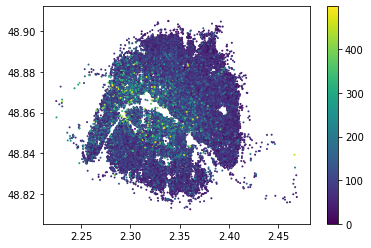

In [71]:
plt.scatter("longitude","latitude", data=airbnb[airbnb["price_num"]<500], s=1, c="price_num")
plt.colorbar()

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [72]:
airbnb_group = airbnb.groupby("review_scores_location")

In [73]:
airbnb_group["price_num"].describe()

,count,mean,std,min,25%,50%,75%,max
review_scores_location,,,,,,,,
2.0,33.0,126.090909,127.207106,23.0,55.0,92.0,120.0,700.0
4.0,27.0,144.703704,375.570009,18.0,37.5,57.0,97.5,2000.0
5.0,17.0,80.058824,52.544589,23.0,59.0,65.0,78.0,229.0
6.0,218.0,100.866972,129.090958,20.0,50.0,70.0,100.0,1000.0
7.0,252.0,79.960317,78.992349,20.0,45.0,60.0,80.0,850.0
8.0,2051.0,97.102389,289.713310,8.0,49.0,65.0,95.0,8932.0
9.0,10054.0,90.891088,145.389518,9.0,50.0,70.0,99.0,9379.0
10.0,32411.0,115.296844,135.184223,0.0,60.0,85.0,125.0,8576.0


In [74]:
salaries["JobTitle"].str.lower().value_counts()

transit operator                                    9424
special nurse                                       5791
registered nurse                                    4955
custodian                                           3214
firefighter                                         3153
                                                    ... 
asst. chief probation officer-juvenile probation       1
is technician assistant                                1
acpo,juvp, juv prob (sfers)                            1
power plant supervisor i                               1
veterniary laboratory technologist                     1
Name: JobTitle, Length: 1637, dtype: int64

In [75]:
salaries["JobTitle"].value_counts()

Transit Operator                                 7036
Special Nurse                                    4389
Registered Nurse                                 3736
Public Svc Aide-Public Works                     2518
Police Officer 3                                 2421
                                                 ... 
CEMENT FINISHER SUPERVISOR II                       1
SECRETARY, COMMISSION ON THE ENVIRONMENT            1
MEDIA/SECURITY SYSTEMS SUPERVISOR                   1
LEGISLATIVE ASSISTANT, CITY ATTORNEY'S OFFICE       1
MANAGER, UNIFIED FAMILY COURT SERVICES              1
Name: JobTitle, Length: 2159, dtype: int64

In [76]:
salaries["JobTitle"] = salaries["JobTitle"].str.lower()

In [77]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             148654 non-null  object 
 11  Agency            148654 non-null  object 
 12  Status            148654 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [78]:
salaries_group = salaries.groupby("JobTitle")

In [79]:
salaries_group["TotalPay"].agg(["mean","count",etendue]).sort_values("mean",ascending=False)

,mean,count,etendue
JobTitle,,,
general manager-metropolitan transit authority,399211.275000,2,336768.31
chief investment officer,339653.700000,1,0.00
"chief, fire department",325971.683333,3,22162.41
chief of police,313885.882500,4,71289.48
deputy director of investments,307899.460000,1,0.00
...,...,...,...
"commissioner 16.700c, no pay",25.760000,50,1288.00
drug court coordinator,0.000000,1,0.00
not provided,0.000000,4,0.00
